#**Vietnamese Speech Recognition with Wav2Vec**
Nh·∫≠n di·ªán gi·ªçng n√≥i ti·∫øng Vi·ªát v·ªõi Wav2Vec

ƒê·ªì √°n chuy√™n ng√†nh **Khoa h·ªçc d·ªØ li·ªáu**

---

**H·ªç v√† t√™n SV 1:** Nguy·ªÖn Th√†nh Ph√°t

**MSSV SV 1:** 2000006273

---

**H·ªç v√† t√™n SV 2:** Tr·∫ßn Th·ªã B√© Quy√™n

**MSSV SV 2:** 2000005977

---


## **C√†i ƒë·∫∑t th∆∞ vi·ªán**

In [ ]:
!pip install datasets jiwer transformers torchaudio accelerate==0.21.0

In [ ]:
from datasets import load_dataset, load_metric, Audio
import IPython.display as ipd
import numpy as np
import random
from datasets import ClassLabel
import pandas as pd
from IPython.display import display, HTML

## **Chu·∫©n b·ªã d·ªØ li·ªáu**

In [ ]:
# L·∫•y d·ªØ li·ªáu common_voice ti·∫øng Vi·ªát
ds_train = load_dataset("mozilla-foundation/common_voice_11_0",
                        "vi", split="train+test")
ds_test = load_dataset("mozilla-foundation/common_voice_11_0",
                       "vi", split="validation")

In [ ]:
ds_test[2]

{'client_id': 'c29d07b14c1806169f49b175b3bc29a620bd2d4c2291a4f8ecbe7dfbaf53fb40f990ebe6617dd1c281d09718ffab9a69d2fb615d19ba084288ba13d134253426',
 'path': '/root/.cache/huggingface/datasets/downloads/extracted/e61ff4958c44afed2f006e32a341db137a35fd4138895095d02c755024f468c4/vi_dev_0/common_voice_vi_25222863.mp3',
 'audio': {'path': '/root/.cache/huggingface/datasets/downloads/extracted/e61ff4958c44afed2f006e32a341db137a35fd4138895095d02c755024f468c4/vi_dev_0/common_voice_vi_25222863.mp3',
  'array': array([0., 0., 0., ..., 0., 0., 0.]),
  'sampling_rate': 48000},
 'sentence': 'Apheng l·∫•y qu·∫°t tay cho√†ng n√≥, n√≥ li·ªÅn h·ªèi',
 'up_votes': 2,
 'down_votes': 0,
 'age': '',
 'gender': '',
 'accent': '',
 'locale': 'vi',
 'segment': ''}

In [ ]:
print(ds_train)
print(ds_test)

Dataset({
    features: ['client_id', 'path', 'audio', 'sentence', 'up_votes', 'down_votes', 'age', 'gender', 'accent', 'locale', 'segment'],
    num_rows: 3762
})
Dataset({
    features: ['client_id', 'path', 'audio', 'sentence', 'up_votes', 'down_votes', 'age', 'gender', 'accent', 'locale', 'segment'],
    num_rows: 248
})


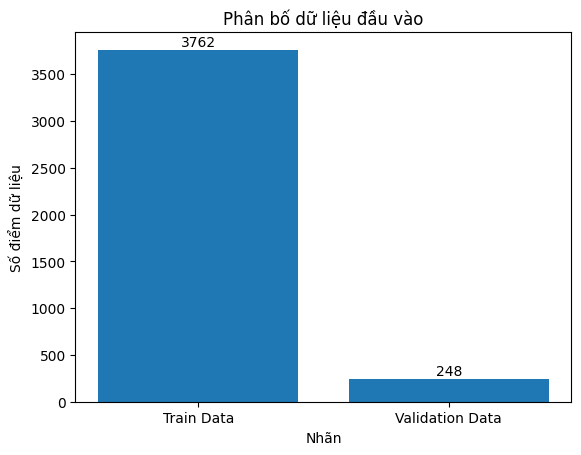

In [ ]:
import matplotlib.pyplot as plt

data = [ds_train.num_rows, ds_test.num_rows]
labels = ['Train Data', 'Validation Data']

plt.bar(labels, data)
for index, value in enumerate(data):
    plt.text(index, value, str(value), ha='center', va='bottom')
plt.xlabel('Nh√£n')
plt.ylabel('S·ªë ƒëi·ªÉm d·ªØ li·ªáu')
plt.title('Ph√¢n b·ªë d·ªØ li·ªáu ƒë·∫ßu v√†o')
plt.show()

## **X·ª≠ l√Ω d·ªØ li·ªáu**

In [ ]:
# Xo√° t·∫•t c·∫£ c·ªôt kh√¥ng c·∫ßn thi·∫øt, ch·ªâ gi·ªØ l·∫°i "sentence", "path", "audio"
ds_train = ds_train.remove_columns(["accent", "age", "client_id", "down_votes", "gender", "locale", "segment", "up_votes"])
ds_test = ds_test.remove_columns(["accent", "age", "client_id", "down_votes", "gender", "locale", "segment", "up_votes"])

In [ ]:
# L·∫•y ng·∫´u nhi√™n N ƒëi·ªÉm d·ªØ li·ªáu trong datasets
def show_random_elements(dataset, num_examples=10):
    assert num_examples <= len(dataset), "Kh√¥ng th·ªÉ l·∫•y nhi·ªÅu h∆°n ƒë·ªô d√†i dataset"
    picks = []
    for _ in range(num_examples):
        pick = random.randint(0, len(dataset)-1)
        while pick in picks:
            pick = random.randint(0, len(dataset)-1)
        picks.append(pick)

    df = pd.DataFrame(dataset[picks])
    display(HTML(df.to_html()))

In [ ]:
show_random_elements(ds_train.remove_columns(["path", "audio"]), num_examples=5)

In [ ]:
# Xo√° d·∫•u v√† c√°c k√Ω t·ª± ƒë·∫∑c bi·ªát
import re
chars_to_ignore_regex = '[\,\?\.\!\-\;\:\"\‚Äú\%\‚Äò\‚Äù\ÔøΩ]'

def remove_special_characters(batch):
    batch["sentence"] = re.sub(chars_to_ignore_regex,
                               '', batch["sentence"]).lower() + " "
    return batch

In [ ]:
ds_train = ds_train.map(remove_special_characters)
ds_test = ds_test.map(remove_special_characters)

In [ ]:
show_random_elements(ds_train.remove_columns(["path","audio"]))

In [ ]:
# Chuy·ªÉn Audio v·ªÅ rate 16000
ds_train = ds_train.cast_column("audio", Audio(sampling_rate=16_000))
ds_test = ds_test.cast_column("audio", Audio(sampling_rate=16_000))

In [ ]:
# L·∫•y m·∫´u m·ªôt ƒëi·ªÉm d·ªØ li·ªáu
rand_int = random.randint(0, len(ds_train)-1)

print(ds_train[rand_int]["sentence"])
ipd.Audio(data=ds_train[rand_int]["audio"]["array"], autoplay=False, rate=16000)

con thanh nh√† m√¨nh b·ªã ma qu·ª∑ qu·∫•y ph√° 


In [ ]:
print("Target text:", ds_train[rand_int]["sentence"])
print("Input array shape:", ds_train[rand_int]["audio"]["array"].shape)
print("Sampling rate:", ds_train[rand_int]["audio"]["sampling_rate"])

Target text: con thanh nh√† m√¨nh b·ªã ma qu·ª∑ qu·∫•y ph√° 
Input array shape: (97536,)
Sampling rate: 16000


## **T·∫°o b·ªô tokenizer**

In [ ]:
# L·∫•y ra t·∫•t c·∫£ k√Ω t·ª± c√≥ th·ªÉ t√¨m ƒë∆∞·ª£c trong dataset
def extract_all_chars(batch):
  all_text = " ".join(batch["sentence"])
  vocab = list(set(all_text))
  return {"vocab": [vocab], "all_text": [all_text]}

In [ ]:
# Map h√†m tr√™n l√™n dataset
vocab_train = ds_train.map(
  extract_all_chars, batched=True,
  batch_size=-1, keep_in_memory=True,
  remove_columns=ds_train.column_names
)
vocab_test = ds_test.map(
  extract_all_chars, batched=True,
  batch_size=-1, keep_in_memory=True,
  remove_columns=ds_test.column_names
)

Map:   0%|          | 0/3762 [00:00<?, ? examples/s]

Map:   0%|          | 0/248 [00:00<?, ? examples/s]

In [ ]:
# L·∫•y danh s√°ch k√Ω t·ª± tr√™n t·∫≠p train v√† test
vocab_list = list(set(vocab_train["vocab"][0]) | set(vocab_test["vocab"][0]))

In [ ]:
# Xem danh s√°ch k√Ω t·ª± l·∫•y ƒë∆∞·ª£c
vocab_dict = {v: k for k, v in enumerate(vocab_list)}
vocab_dict

{'·∫°': 0,
 'g': 1,
 'f': 2,
 '√π': 3,
 'a': 4,
 'w': 5,
 '·ªõ': 6,
 '·ª±': 7,
 '·ªü': 8,
 'ƒÉ': 9,
 '·ªç': 10,
 '·∫Ω': 11,
 '·ª´': 12,
 '·ªô': 13,
 'u': 14,
 'z': 15,
 '√≤': 16,
 '√™': 17,
 '∆∞': 18,
 '√†': 19,
 '·ªÉ': 20,
 '·ª∑': 21,
 'j': 22,
 's': 23,
 'y': 24,
 'v': 25,
 '≈©': 26,
 '√≥': 27,
 "'": 28,
 '∆°': 29,
 '·ªØ': 30,
 '·∫´': 31,
 '·ªì': 32,
 '·ªè': 33,
 't': 34,
 'r': 35,
 '·∫≥': 36,
 'n': 37,
 '·ªá': 38,
 '·ªÖ': 39,
 '·ª≠': 40,
 'e': 41,
 '·∫∑': 42,
 '·∫ß': 43,
 'ƒ©': 44,
 'i': 45,
 '·ª≥': 46,
 '·ªâ': 47,
 '·∫ø': 48,
 'q': 49,
 'x': 50,
 '·∫©': 51,
 'm': 52,
 '·ªÅ': 53,
 'd': 54,
 'c': 55,
 '·ªß': 56,
 'p': 57,
 '√¥': 58,
 '·ªù': 59,
 '√Ω': 60,
 '√µ': 61,
 '·ªµ': 62,
 '·∫•': 63,
 '·ªó': 64,
 'b': 65,
 '√®': 66,
 '·∫ª': 67,
 '·ªã': 68,
 ' ': 69,
 '·ª°': 70,
 '√∫': 71,
 '·ªï': 72,
 '√£': 73,
 '·∫π': 74,
 '·ªë': 75,
 'h': 76,
 'k': 77,
 '√°': 78,
 '√©': 79,
 'l': 80,
 '·∫≠': 81,
 'ƒë': 82,
 '·ª£': 83,
 '·ªπ': 84,
 '·∫±': 85,
 'o': 86,
 '√¨': 87,
 '·∫Ø': 88,
 '·∫µ': 89,
 '·ª•'

In [ ]:
# Thay th·∫ø kho·∫£ng c√°ch b·∫±ng d·∫•u ph√¢n c√°ch
vocab_dict["|"] = vocab_dict[" "]
del vocab_dict[" "]

In [ ]:
# Th√™m [UNK] cho t·ª´ kh√¥ng x√°c ƒë·ªãnh
vocab_dict["[UNK]"] = len(vocab_dict)
# Th√™m [PAD] ƒë·ªÉ padding cho c√πng chi·ªÅu d√†i input
vocab_dict["[PAD]"] = len(vocab_dict)
# In chi·ªÅu d√†i t·ª´ ƒëi·ªÉn
len(vocab_dict)

97

In [ ]:
# L∆∞u t·ª´ ƒëi·ªÉn th√†nh file json
import json
with open('vocab.json', 'w') as vocab_file:
    json.dump(vocab_dict, vocab_file)

In [ ]:
# Login HF ƒë·ªÉ c√≥ l∆∞u l·∫°i model v√† tokenizer
from huggingface_hub import notebook_login
notebook_login()

In [ ]:
# T√™n model ƒë·ªÉ load t·ª´ HuggingFace
# Model g·ªëc
model_wav2vec2 = "facebook/wav2vec2-large-xlsr-53"
# ƒê·∫∑t t√™n model m·ªõi ƒë·ªÉ finetuning t·ª´ model g·ªëc cho Ti·∫øng Vi·ªát
model_checkpoint = "phatjk/wav2vec2-vi"

In [ ]:
from transformers import AutoConfig
# Load file config.json t·ª´ model g·ªëc
config = AutoConfig.from_pretrained(model_wav2vec2)

tokenizer_type = config.model_type if config.tokenizer_class is None else None
config = config if config.tokenizer_class is not None else None

In [ ]:
# T·∫°o b·ªô tokenizer t·ª´ vocab.json
from transformers import Wav2Vec2CTCTokenizer
tokenizer = Wav2Vec2CTCTokenizer.from_pretrained(
  "./",
  config=config,
  tokenizer_type=tokenizer_type,
  unk_token="[UNK]",
  pad_token="[PAD]",
  word_delimiter_token="|",
)
# L∆∞u l·∫°i tokenizer Ti·∫øng Vi·ªát (l√†m 1 l·∫ßn duy nh·∫•t)
# tokenizer.push_to_hub(model_checkpoint)

Special tokens have been added in the vocabulary, make sure the associated word embeddings are fine-tuned or trained.


In [ ]:
from transformers import Wav2Vec2CTCTokenizer
# Load tokenizer t·ª´ hub ƒë√£ l∆∞u ·ªü tr√™n
tokenizer = Wav2Vec2CTCTokenizer.from_pretrained(
  model_checkpoint,
  config=config,
  tokenizer_type=tokenizer_type,
  unk_token="[UNK]",
  pad_token="[PAD]",
  word_delimiter_token="|",
)

In [ ]:
tokenizer

Wav2Vec2CTCTokenizer(name_or_path='phatjk/wav2vec2-vi', vocab_size=97, model_max_length=1000000000000000019884624838656, is_fast=False, padding_side='right', truncation_side='right', special_tokens={'bos_token': '<s>', 'eos_token': '</s>', 'unk_token': '[UNK]', 'pad_token': '[PAD]', 'additional_special_tokens': [AddedToken("<s>", rstrip=False, lstrip=False, single_word=False, normalized=True), AddedToken("</s>", rstrip=False, lstrip=False, single_word=False, normalized=True), AddedToken("<s>", rstrip=False, lstrip=False, single_word=False, normalized=True), AddedToken("</s>", rstrip=False, lstrip=False, single_word=False, normalized=True)]}, clean_up_tokenization_spaces=True)

In [ ]:
# Load Extractor
from transformers import Wav2Vec2FeatureExtractor
feature_extractor = Wav2Vec2FeatureExtractor.from_pretrained(model_wav2vec2)

In [ ]:
feature_extractor

Wav2Vec2FeatureExtractor {
  "do_normalize": true,
  "feature_extractor_type": "Wav2Vec2FeatureExtractor",
  "feature_size": 1,
  "padding_side": "right",
  "padding_value": 0,
  "return_attention_mask": true,
  "sampling_rate": 16000
}

In [ ]:
# Load Wav2Vec2Processor
from transformers import Wav2Vec2Processor
processor = Wav2Vec2Processor(feature_extractor=feature_extractor, tokenizer=tokenizer)

In [ ]:
# H√†m map processor l√™n audio v√† nh√£n c·ªßa t·ª´ng ƒëi·ªÉm d·ªØ li·ªáu tr√™n t·∫≠p
def prepare_dataset(batch):
    audio = batch["audio"]

    # batched output is "un-batched"
    batch["input_values"] = processor(audio["array"],
                                      sampling_rate=audio["sampling_rate"]).input_values[0]
    batch["input_length"] = len(batch["input_values"])

    with processor.as_target_processor():
        batch["labels"] = processor(batch["sentence"]).input_ids
    return batch

In [ ]:
ds_train = ds_train.map(prepare_dataset, remove_columns=ds_train.column_names)
ds_test = ds_test.map(prepare_dataset, remove_columns=ds_test.column_names)

In [ ]:
# ƒê·∫∑t ƒë·ªô d√†i t·ªëi ƒëa ƒë·∫ßu v√†o l√† 15s
max_input_length_in_sec = 15.0
ds_train = ds_train.filter(lambda x: x < max_input_length_in_sec * processor.feature_extractor.sampling_rate,
                           input_columns=["input_length"])
ds_test = ds_test.filter(lambda x: x < max_input_length_in_sec * processor.feature_extractor.sampling_rate,
                          input_columns=["input_length"])

In [ ]:
import torch

from dataclasses import dataclass, field
from typing import Any, Dict, List, Optional, Union

@dataclass
class DataCollatorCTCWithPadding:
    """
    B·ªô ƒë·ªëi chi·∫øu d·ªØ li·ªáu (DataCollator) s·∫Ω t·ª± ƒë·ªông pad c√°c ƒë·∫ßu v√†o nh·∫≠n ƒë∆∞·ª£c.
    Args:
        processor (:class:`~transformers.Wav2Vec2Processor`)
            The processor used for proccessing the data.
        padding (:obj:`bool`, :obj:`str` or :class:`~transformers.tokenization_utils_base.PaddingStrategy`, `optional`, defaults to :obj:`True`):
            Select a strategy to pad the returned sequences (according to the model's padding side and padding index)
            among:
            * :obj:`True` or :obj:`'longest'`: Pad to the longest sequence in the batch (or no padding if only a single
              sequence if provided).
            * :obj:`'max_length'`: Pad to a maximum length specified with the argument :obj:`max_length` or to the
              maximum acceptable input length for the model if that argument is not provided.
            * :obj:`False` or :obj:`'do_not_pad'` (default): No padding (i.e., can output a batch with sequences of
              different lengths).
        max_length (:obj:`int`, `optional`):
            Maximum length of the ``input_values`` of the returned list and optionally padding length (see above).
        max_length_labels (:obj:`int`, `optional`):
            Maximum length of the ``labels`` returned list and optionally padding length (see above).
        pad_to_multiple_of (:obj:`int`, `optional`):
            If set will pad the sequence to a multiple of the provided value.
            This is especially useful to enable the use of Tensor Cores on NVIDIA hardware with compute capability >=
            7.5 (Volta).
    """

    processor: Wav2Vec2Processor
    padding: Union[bool, str] = True
    max_length: Optional[int] = None
    max_length_labels: Optional[int] = None
    pad_to_multiple_of: Optional[int] = None
    pad_to_multiple_of_labels: Optional[int] = None

    def __call__(self, features: List[Dict[str, Union[List[int], torch.Tensor]]]) -> Dict[str, torch.Tensor]:
        # split inputs and labels since they have to be of different lenghts and need
        # different padding methods
        input_features = [{"input_values": feature["input_values"]} for feature in features]
        label_features = [{"input_ids": feature["labels"]} for feature in features]

        batch = self.processor.pad(
            input_features,
            padding=self.padding,
            max_length=self.max_length,
            pad_to_multiple_of=self.pad_to_multiple_of,
            return_tensors="pt",
        )
        with self.processor.as_target_processor():
            labels_batch = self.processor.pad(
                label_features,
                padding=self.padding,
                max_length=self.max_length_labels,
                pad_to_multiple_of=self.pad_to_multiple_of_labels,
                return_tensors="pt",
            )

        # thay th·∫ø ph·∫ßn pad b·∫±ng -100 ƒë·ªÉ b·ªè qua loss m·ªôt c√°ch ch√≠nh x√°c
        labels = labels_batch["input_ids"].masked_fill(labels_batch.attention_mask.ne(1), -100)

        batch["labels"] = labels

        return batch

In [ ]:
# Tr√¨nh ƒë·ªëi chi·∫øu d·ªØ li·ªáu DataCollatorCTCWithPadding
data_collator = DataCollatorCTCWithPadding(processor=processor, padding=True)

#**T·∫°o h√†m t√≠nh ƒë·ªô ƒëo WER**

In [ ]:
# Load h√†m t√≠nh to√°n ch·ªâ s·ªë wer
wer_metric = load_metric("wer")

<ipython-input-37-90fa34a768ae>:2: FutureWarning: load_metric is deprecated and will be removed in the next major version of datasets. Use 'evaluate.load' instead, from the new library ü§ó Evaluate: https://huggingface.co/docs/evaluate
  wer_metric = load_metric("wer")


In [ ]:
# H√†m t√≠nh ch·ªâ s·ªë wer tr√™n t·∫≠p validation
def compute_metrics(pred):
    pred_logits = pred.predictions
    pred_ids = np.argmax(pred_logits, axis=-1)

    pred.label_ids[pred.label_ids == -100] = processor.tokenizer.pad_token_id

    pred_str = processor.batch_decode(pred_ids)
    # Kh√¥ng nh√≥m c√°c tokens (group_tokens) khi t√≠nh metrics
    label_str = processor.batch_decode(pred.label_ids, group_tokens=False)

    wer = wer_metric.compute(predictions=pred_str, references=label_str)

    return {"wer": wer}

# **Load m√¥ h√¨nh**

In [ ]:
from transformers import AutoModelForCTC
# T·∫£i model wav2vec2 g·ªëc
model = AutoModelForCTC.from_pretrained(
    model_wav2vec2,
    attention_dropout=0.1,
    hidden_dropout=0.1,
    feat_proj_dropout=0.0,
    mask_time_prob=0.05,
    layerdrop=0.1,
    ctc_loss_reduction="mean",
    pad_token_id=processor.tokenizer.pad_token_id,
    vocab_size=len(processor.tokenizer)
).to("cuda")

Some weights of Wav2Vec2ForCTC were not initialized from the model checkpoint at facebook/wav2vec2-large-xlsr-53 and are newly initialized: ['lm_head.weight', 'lm_head.bias']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


In [ ]:
# ƒê√≥ng bƒÉng l·ªõp tr√≠ch xu·∫•t ƒë·∫∑c tr∆∞ng ƒë·ªÉ kh√¥ng training l·ªõp n√†y
if hasattr(model, "freeze_feature_extractor"):
  model.freeze_feature_extractor()

/usr/local/lib/python3.10/dist-packages/transformers/models/wav2vec2/modeling_wav2vec2.py:1925: FutureWarning: The method `freeze_feature_extractor` is deprecated and will be removed in Transformers v5.Please use the equivalent `freeze_feature_encoder` method instead.
  warnings.warn(


In [ ]:
from transformers import TrainingArguments

training_args = TrainingArguments(
  output_dir="wav2vec_vietnamese",
  group_by_length=True,
  per_device_train_batch_size=30,
  gradient_accumulation_steps=2,
  evaluation_strategy="steps",
  num_train_epochs=7,
  gradient_checkpointing=True,
  save_steps=50,
  eval_steps=50,
  logging_steps=50,
  learning_rate=3e-4,
  save_total_limit=2,
)

In [ ]:
from transformers import Trainer

trainer = Trainer(
    model=model,
    data_collator=data_collator,
    args=training_args,
    compute_metrics=compute_metrics,
    train_dataset=ds_train,
    eval_dataset=ds_test,
    tokenizer=processor.feature_extractor,
)

In [ ]:
trainer.train()

/usr/local/lib/python3.10/dist-packages/transformers/models/wav2vec2/processing_wav2vec2.py:155: UserWarning: `as_target_processor` is deprecated and will be removed in v5 of Transformers. You can process your labels by using the argument `text` of the regular `__call__` method (either in the same call as your audio inputs, or in a separate call.
  warnings.warn(


/usr/local/lib/python3.10/dist-packages/transformers/models/wav2vec2/processing_wav2vec2.py:155: UserWarning: `as_target_processor` is deprecated and will be removed in v5 of Transformers. You can process your labels by using the argument `text` of the regular `__call__` method (either in the same call as your audio inputs, or in a separate call.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/transformers/models/wav2vec2/processing_wav2vec2.py:155: UserWarning: `as_target_processor` is deprecated and will be removed in v5 of Transformers. You can process your labels by using the argument `text` of the regular `__call__` method (either in the same call as your audio inputs, or in a separate call.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/transformers/models/wav2vec2/processing_wav2vec2.py:155: UserWarning: `as_target_processor` is deprecated and will be removed in v5 of Transformers. You can process your labels by using the argument `text` of the regular `__call

/usr/local/lib/python3.10/dist-packages/transformers/models/wav2vec2/processing_wav2vec2.py:155: UserWarning: `as_target_processor` is deprecated and will be removed in v5 of Transformers. You can process your labels by using the argument `text` of the regular `__call__` method (either in the same call as your audio inputs, or in a separate call.
  warnings.warn(


TrainOutput(global_step=441, training_loss=3.885882111633716, metrics={'train_runtime': 5269.0842, 'train_samples_per_second': 4.998, 'train_steps_per_second': 0.084, 'total_flos': 3.549038450546166e+18, 'train_loss': 3.885882111633716, 'epoch': 7.0})

In [ ]:
trainer.evaluate()

{'eval_loss': 3.3344216346740723,
 'eval_wer': 1.0,
 'eval_runtime': 21.064,
 'eval_samples_per_second': 11.774,
 'eval_steps_per_second': 1.472,
 'epoch': 7.0}

<function matplotlib.pyplot.show(close=None, block=None)>

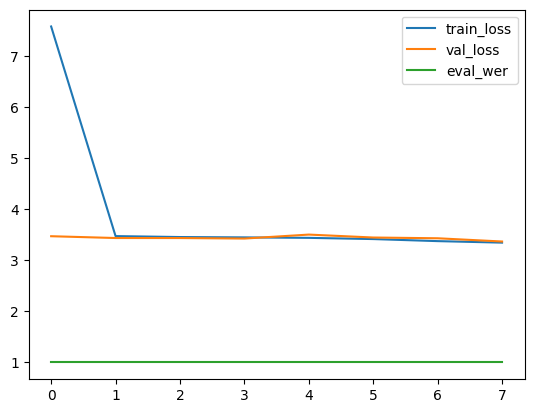

In [ ]:
# Plot bi·ªÉu ƒë·ªì ƒë∆∞·ªùng loss c·ªßa training v√† validation
training_loss,validation_loss=[],[]
validation_wer=[]
t = 0
for i in trainer.state.log_history[:-2]:
   if t == 0:
     training_loss.append(i["loss"])
     t=1
   else:
     validation_loss.append(i["eval_loss"])
     validation_wer.append(i["eval_wer"])
     t=0
from matplotlib import pyplot as plt
plt.plot(training_loss, label='train_loss')
plt.plot(validation_loss,label='val_loss')
plt.plot(validation_wer,label='eval_wer')
plt.legend()
plt.show

In [ ]:
repo_name = "phatjk/wav2vec2-vi"
model.push_to_hub(repo_name)

pytorch_model.bin:   0%|          | 0.00/1.26G [00:00<?, ?B/s]

CommitInfo(commit_url='https://huggingface.co/phatjk/wav2vec2-vi/commit/819c955a20c398f7dcf5438c87db97e63143aa75', commit_message='Upload Wav2Vec2ForCTC', commit_description='', oid='819c955a20c398f7dcf5438c87db97e63143aa75', pr_url=None, pr_revision=None, pr_num=None)

In [ ]:
trainer.train()

/usr/local/lib/python3.10/dist-packages/transformers/models/wav2vec2/processing_wav2vec2.py:155: UserWarning: `as_target_processor` is deprecated and will be removed in v5 of Transformers. You can process your labels by using the argument `text` of the regular `__call__` method (either in the same call as your audio inputs, or in a separate call.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/transformers/models/wav2vec2/processing_wav2vec2.py:155: UserWarning: `as_target_processor` is deprecated and will be removed in v5 of Transformers. You can process your labels by using the argument `text` of the regular `__call__` method (either in the same call as your audio inputs, or in a separate call.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/transformers/models/wav2vec2/processing_wav2vec2.py:155: UserWarning: `as_target_processor` is deprecated and will be removed in v5 of Transformers. You can process your labels by using the argument `text` of the regular `__call

TrainOutput(global_step=441, training_loss=2.1615884655457234, metrics={'train_runtime': 5308.6492, 'train_samples_per_second': 4.961, 'train_steps_per_second': 0.083, 'total_flos': 3.551949127093889e+18, 'train_loss': 2.1615884655457234, 'epoch': 7.0})

In [ ]:
trainer.evaluate()

{'eval_loss': 0.889062225818634,
 'eval_wer': 0.770405476566614,
 'eval_runtime': 21.7224,
 'eval_samples_per_second': 11.417,
 'eval_steps_per_second': 1.427,
 'epoch': 7.0}

<function matplotlib.pyplot.show(close=None, block=None)>

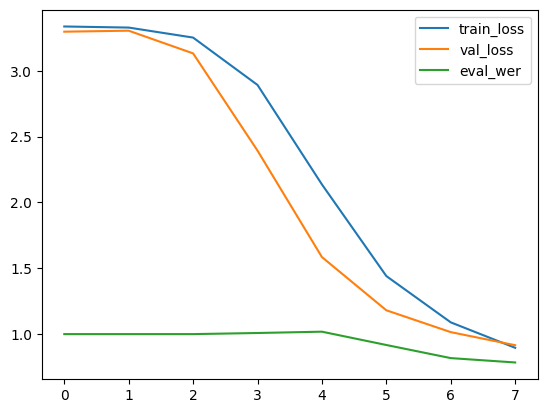

In [ ]:
# Plot bi·ªÉu ƒë·ªì ƒë∆∞·ªùng loss c·ªßa training v√† validation
training_loss,validation_loss=[],[]
validation_wer=[]
t = 0
for i in trainer.state.log_history[:-3]:
   if t == 0:
     training_loss.append(i["loss"])
     t=1
   else:
     validation_loss.append(i["eval_loss"])
     validation_wer.append(i["eval_wer"])
     t=0
from matplotlib import pyplot as plt
plt.plot(training_loss, label='train_loss')
plt.plot(validation_loss,label='val_loss')
plt.plot(validation_wer,label='eval_wer')
plt.legend()
plt.show

In [ ]:
repo_name = "phatjk/wav2vec2-vi"
model.push_to_hub(repo_name)

pytorch_model.bin:   0%|          | 0.00/1.26G [00:00<?, ?B/s]

CommitInfo(commit_url='https://huggingface.co/phatjk/wav2vec2-vi/commit/b9292570ae156a4df7a19bafef7034fdb92c30ff', commit_message='Upload Wav2Vec2ForCTC', commit_description='', oid='b9292570ae156a4df7a19bafef7034fdb92c30ff', pr_url=None, pr_revision=None, pr_num=None)

In [ ]:
trainer.train()

/usr/local/lib/python3.10/dist-packages/transformers/models/wav2vec2/processing_wav2vec2.py:155: UserWarning: `as_target_processor` is deprecated and will be removed in v5 of Transformers. You can process your labels by using the argument `text` of the regular `__call__` method (either in the same call as your audio inputs, or in a separate call.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/transformers/models/wav2vec2/processing_wav2vec2.py:155: UserWarning: `as_target_processor` is deprecated and will be removed in v5 of Transformers. You can process your labels by using the argument `text` of the regular `__call__` method (either in the same call as your audio inputs, or in a separate call.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/transformers/models/wav2vec2/processing_wav2vec2.py:155: UserWarning: `as_target_processor` is deprecated and will be removed in v5 of Transformers. You can process your labels by using the argument `text` of the regular `__call

/usr/local/lib/python3.10/dist-packages/transformers/models/wav2vec2/processing_wav2vec2.py:155: UserWarning: `as_target_processor` is deprecated and will be removed in v5 of Transformers. You can process your labels by using the argument `text` of the regular `__call__` method (either in the same call as your audio inputs, or in a separate call.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/transformers/models/wav2vec2/processing_wav2vec2.py:155: UserWarning: `as_target_processor` is deprecated and will be removed in v5 of Transformers. You can process your labels by using the argument `text` of the regular `__call__` method (either in the same call as your audio inputs, or in a separate call.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/transformers/models/wav2vec2/processing_wav2vec2.py:155: UserWarning: `as_target_processor` is deprecated and will be removed in v5 of Transformers. You can process your labels by using the argument `text` of the regular `__call

TrainOutput(global_step=441, training_loss=0.4996468572119196, metrics={'train_runtime': 5286.6358, 'train_samples_per_second': 4.981, 'train_steps_per_second': 0.083, 'total_flos': 3.5523796728548413e+18, 'train_loss': 0.4996468572119196, 'epoch': 7.0})

In [ ]:
trainer.evaluate()

{'eval_loss': 0.6021169424057007,
 'eval_wer': 0.5555555555555556,
 'eval_runtime': 21.8445,
 'eval_samples_per_second': 11.353,
 'eval_steps_per_second': 1.419,
 'epoch': 7.0}

In [ ]:
repo_name = "phatjk/wav2vec2-vi"
model.push_to_hub(repo_name)

pytorch_model.bin:   0%|          | 0.00/1.26G [00:00<?, ?B/s]

CommitInfo(commit_url='https://huggingface.co/phatjk/wav2vec2-vi/commit/e3c04a1f37f00ed9ec90164194a497d6209b97b3', commit_message='Upload Wav2Vec2ForCTC', commit_description='', oid='e3c04a1f37f00ed9ec90164194a497d6209b97b3', pr_url=None, pr_revision=None, pr_num=None)

<function matplotlib.pyplot.show(close=None, block=None)>

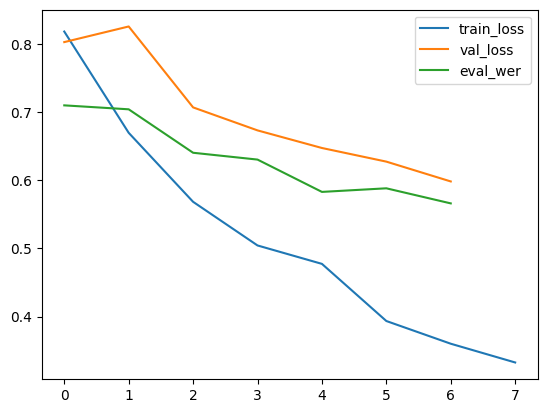

In [ ]:
# Plot bi·ªÉu ƒë·ªì ƒë∆∞·ªùng loss c·ªßa training v√† validation
training_loss,validation_loss=[],[]
validation_wer=[]
t = 0
for i in trainer.state.log_history[:-3]:
   if t == 0:
     training_loss.append(i["loss"])
     t=1
   else:
     validation_loss.append(i["eval_loss"])
     validation_wer.append(i["eval_wer"])
     t=0
from matplotlib import pyplot as plt
plt.plot(training_loss, label='train_loss')
plt.plot(validation_loss,label='val_loss')
plt.plot(validation_wer,label='eval_wer')
plt.legend()
plt.show

In [ ]:
# Ch·ªçn m·ªôt audio ng·∫´u nhi√™n ƒë·ªÉ test th·ª≠
import IPython.display as ipd
import numpy as np
import random
audio_num = random.randint(0, ds_test.num_rows)
ipd.Audio(data=ds_test[audio_num]["input_values"], autoplay=False, rate=16000)

In [ ]:
# K·∫øt qu·∫£ d·ª± ƒëo√°n
from transformers import AutoModelForCTC

inputs = processor(ds_test[audio_num]["input_values"], sampling_rate=16000, return_tensors="pt")
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
inputs = inputs.to(device)
with torch.no_grad():
    logits = model(**inputs).logits
    # Ket qua du doan
    predicted_ids = torch.argmax(logits, dim=-1)
    transcription = processor.batch_decode(predicted_ids)
    print("Result: ",transcription)

Result:  ['n√≥ h√∫c vƒÉng c·∫£ ng∆∞·ªùi c·∫£ s√™']
